In [1]:
from flask import Flask, render_template, send_file, request
import matplotlib.pyplot as plt
from nsepy import get_history
from mplfinance.original_flavor import candlestick_ohlc
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.dates as mpdates
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
import yfinance
from matplotlib.pylab import rcParams
import dateutil.relativedelta as dr
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import mplfinance as mpf
rcParams[ 'figure.figsize' ]=20,10


plt.rc('font', size=14)

C:\Users\bshik\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
def obtain_data(ticker, start, end):
    # Enter the start and end dates using the method date(yyyy,m,dd)
    stock = get_history(symbol=ticker, start=start, end=end, index=True)
    df = stock.copy()
    df = df.reset_index()

    df.index = df.Date
    return df

In [3]:
df=obtain_data('NIFTY',date(2020,1,1),date(2021,5,18))


df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)


In [4]:
def plot_all():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    fig.show()



<ipython-input-4-1baae9582566>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


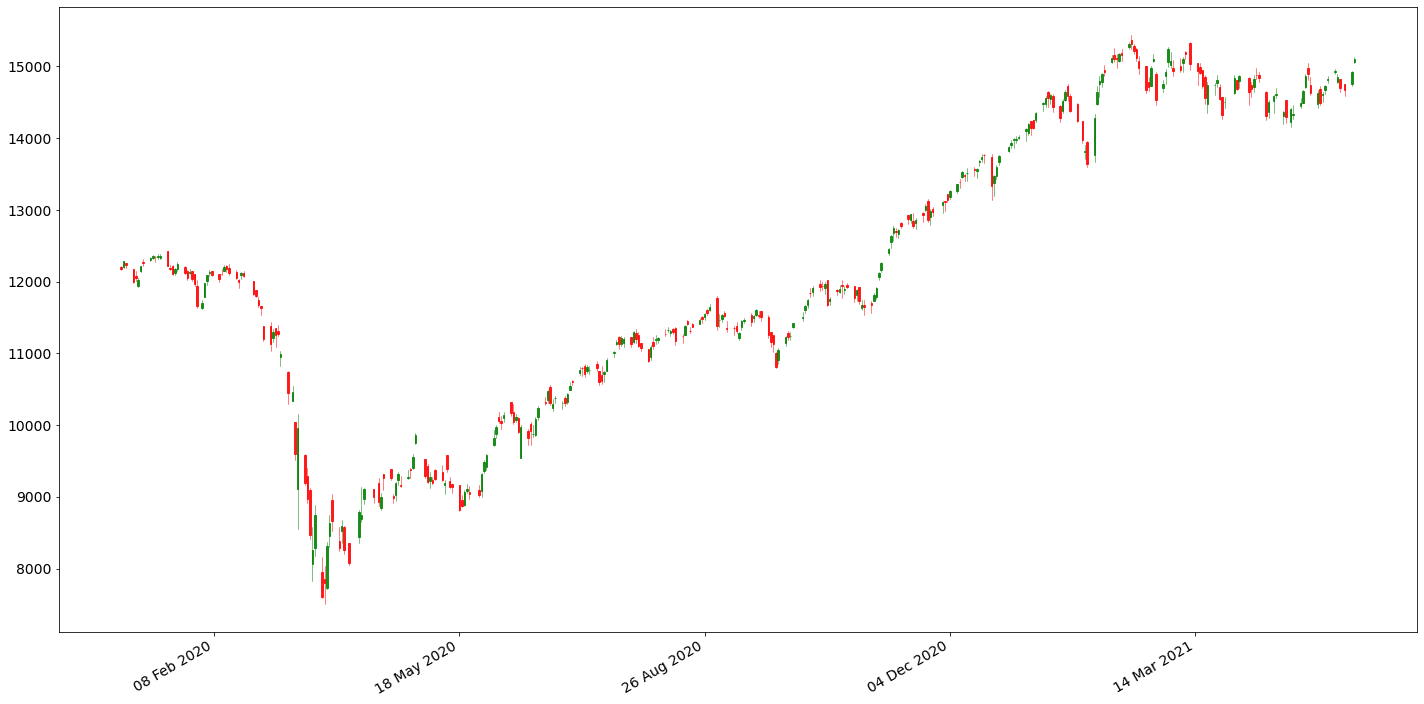

In [5]:
plot_all()

In [6]:
def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
   and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]

    return resistance

In [7]:
levels = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        levels.append((i,df['Low'][i]))
    elif isResistance(df,i):
        levels.append((i,df['High'][i]))

In [8]:
def plot_al():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    for level in levels:
        plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
    fig.show()

In [9]:
s =  np.mean(df['High'] - df['Low'])

In [10]:
def isFarFromLevel(l):
    return np.sum([abs(l - x) < s for x in levels]) == 0

<ipython-input-8-ba3332f4e6db>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


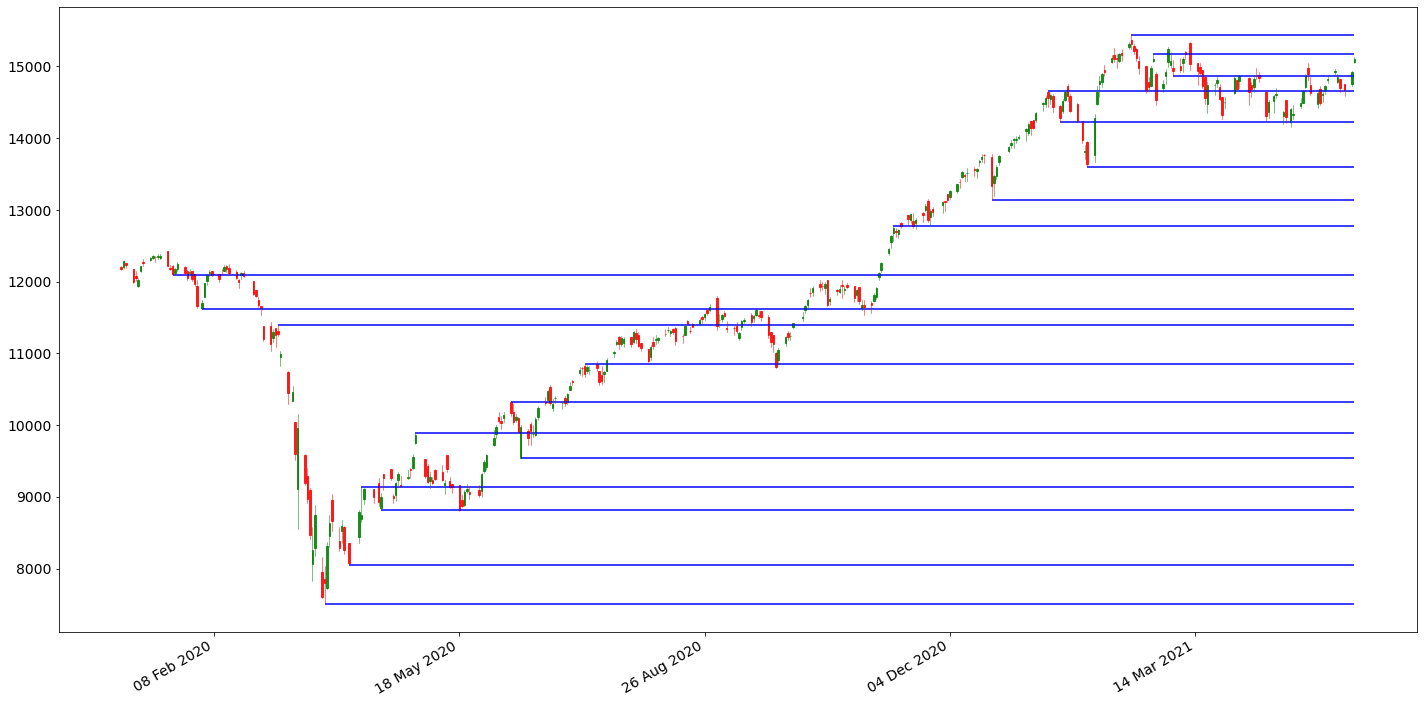

In [11]:
levels = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        l = df['Low'][i]

        if isFarFromLevel(l):
              levels.append((i,l))
    elif isResistance(df,i):
        l = df['High'][i]

        if isFarFromLevel(l):
              levels.append((i,l))

plot_al()


In [12]:
df["Date"]=pd.to_datetime(df.Date)
df.index=df['Date']

In [13]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


In [14]:
import math
train_value =math.floor( len(df) * 0.9)
remain_value = math.floor(len(df) - train_value)
remain_value


35

In [15]:
open_data = df.sort_index(ascending=True, axis=0)
new_open_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', "Open"])
valid_open_data = pd.DataFrame(index=range(0, remain_value), columns=["Date", "Predictions"])

for i in range(0, len(open_data)):
    new_open_dataset["Date"][i] = open_data['Date'][i]
    new_open_dataset["Open"][i] = open_data["Open"][i]

new_open_dataset.index = new_open_dataset.Date
new_open_dataset.drop("Date", axis=1, inplace=True)

final_open_dataset = new_open_dataset.values

train_open_data = final_open_dataset[0:, :0]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_open_data = scaler.fit_transform(final_open_dataset)

x_train_open_data, y_train_open_data = [], []

for i in range(60, len(train_open_data)):
    x_train_open_data.append(scaled_open_data[i - 60:i, 0])
    y_train_open_data.append(scaled_open_data[i, 0])

x_train_open_data, y_train_open_data = np.array(x_train_open_data), np.array(y_train_open_data)

x_train_open_data = np.reshape(x_train_open_data, (x_train_open_data.shape[0], x_train_open_data.shape[1], 1))

# high data
high_data = df.sort_index(ascending=True, axis=0)
new_high_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', "High"])

for i in range(0, len(high_data)):
    new_high_dataset["Date"][i] = high_data['Date'][i]
    new_high_dataset["High"][i] = high_data["High"][i]

new_original_dataset = new_high_dataset.copy()
new_high_dataset.index = new_high_dataset.Date
new_high_dataset.drop("Date", axis=1, inplace=True)

final_high_dataset = new_high_dataset.values

train_high_data = final_high_dataset[0:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_high_data = scaler.fit_transform(final_high_dataset)

x_train_high_data, y_train_high_data = [], []

for i in range(60, len(train_high_data)):
    x_train_high_data.append(scaled_high_data[i - 60:i, 0])
    y_train_high_data.append(scaled_high_data[i, 0])

x_train_high_data, y_train_high_data = np.array(x_train_high_data), np.array(y_train_high_data)

x_train_high_data = np.reshape(x_train_high_data, (x_train_high_data.shape[0], x_train_high_data.shape[1], 1))

# low data
low_data = df.sort_index(ascending=True, axis=0)
new_low_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', "Low"])

for i in range(0, len(high_data)):
    new_low_dataset["Date"][i] = low_data['Date'][i]
    new_low_dataset["Low"][i] = low_data["Low"][i]

new_prediction_dataset = new_low_dataset.copy()

new_low_dataset.index = new_low_dataset.Date
new_low_dataset.drop("Date", axis=1, inplace=True)

final_low_dataset = new_low_dataset.values

train_low_data = final_low_dataset[0:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_low_data = scaler.fit_transform(final_low_dataset)
x_train_low_data, y_train_low_data = [], []

for i in range(60, len(train_low_data)):
    x_train_low_data.append(scaled_low_data[i - 60:i, 0])
    y_train_low_data.append(scaled_low_data[i, 0])

x_train_low_data, y_train_low_data = np.array(x_train_low_data), np.array(y_train_low_data)

x_train_low_data = np.reshape(x_train_low_data, (x_train_low_data.shape[0], x_train_low_data.shape[1], 1))

# close data

close_data = df.sort_index(ascending=True, axis=0)
new_close_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', "Close"])

for i in range(0, len(close_data)):
    new_close_dataset["Date"][i] = close_data['Date'][i]
    new_close_dataset["Close"][i] = close_data["Close"][i]

new_close_dataset.index = new_close_dataset.Date
new_close_dataset.drop("Date", axis=1, inplace=True)

final_close_dataset = new_close_dataset.values

train_close_data = final_close_dataset[0:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_data = scaler.fit_transform(final_close_dataset)

x_train_close_data, y_train_close_data = [], []

for i in range(60, len(train_close_data)):
    x_train_close_data.append(scaled_close_data[i - 60:i, 0])
    y_train_close_data.append(scaled_close_data[i, 0])

x_train_close_data, y_train_close_data = np.array(x_train_close_data), np.array(y_train_close_data)

x_train_close_data = np.reshape(x_train_close_data, (x_train_close_data.shape[0], x_train_close_data.shape[1], 1))



# open
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_open_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_open_data,y_train_open_data,epochs=1,batch_size=1,verbose=2)

inputs_open_data=new_open_dataset[len(new_open_dataset)- remain_value -60:].values
inputs_open_data=inputs_open_data.reshape(-1,1)
inputs_open_data=scaler.transform(inputs_open_data)
print(len(new_open_dataset)- remain_value -60)

# high
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_close_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_high_data,y_train_high_data,epochs=1,batch_size=1,verbose=2)

inputs_high_data=new_high_dataset[len(new_high_dataset)- remain_value-60:].values
inputs_high_data=inputs_high_data.reshape(-1,1)
inputs_high_data=scaler.transform(inputs_high_data)

# low
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_low_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_low_data,y_train_low_data,epochs=1,batch_size=1,verbose=2)

inputs_low_data=new_low_dataset[len(new_low_dataset)- remain_value-60:].values
inputs_low_data=inputs_low_data.reshape(-1,1)
inputs_low_data=scaler.transform(inputs_low_data)



#close
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_close_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_close_data,y_train_close_data,epochs=1,batch_size=1,verbose=2)

inputs_close_data=new_close_dataset[len(new_close_dataset)- remain_value-60:].values
inputs_close_data=inputs_close_data.reshape(-1,1)
inputs_close_data=scaler.transform(inputs_close_data)




# open
X_open_test=[]
for i in range(60,inputs_open_data.shape[0]):
    X_open_test.append(inputs_open_data[i-60:i,0])
X_open_test=np.array(X_open_test)

X_open_test=np.reshape(X_open_test,(X_open_test.shape[0],X_open_test.shape[1],1))
prediction_opening=lstm_model.predict(X_open_test)
prediction_opening=scaler.inverse_transform(prediction_opening)





#high
X_high_test=[]
for i in range(60,inputs_high_data.shape[0]):
    X_high_test.append(inputs_high_data[i-60:i,0])
X_high_test=np.array(X_high_test)

X_high_test=np.reshape(X_high_test,(X_high_test.shape[0],X_high_test.shape[1],1))
prediction_high=lstm_model.predict(X_high_test)
prediction_high=scaler.inverse_transform(prediction_high)


#low
X_low_test=[]
for i in range(60,inputs_low_data.shape[0]):
    X_low_test.append(inputs_low_data[i-60:i,0])
X_low_test=np.array(X_low_test)

X_low_test=np.reshape(X_low_test,(X_low_test.shape[0],X_low_test.shape[1],1))
prediction_low=lstm_model.predict(X_low_test)
prediction_low=scaler.inverse_transform(prediction_low)

#close
X_close_test=[]
for i in range(60,inputs_close_data.shape[0]):
    X_close_test.append(inputs_close_data[i-60:i,0])
X_close_test=np.array(X_close_test)

X_close_test=np.reshape(X_close_test,(X_close_test.shape[0],X_close_test.shape[1],1))
prediction_closing=lstm_model.predict(X_close_test)
prediction_closing=scaler.inverse_transform(prediction_closing)

lstm_model.save("saved_lstm_model.h5")

valid_open_data["Predictions"] = prediction_opening

valid_high_data = pd.DataFrame(index=range(0, len(prediction_high)), columns=["Predictions"])

# for i in range(0,len(prediction_opening)):
valid_high_data["Predictions"] = prediction_high

valid_low_data = pd.DataFrame(index=range(0, len(prediction_low)), columns=["Predictions"])

# for i in range(0,len(prediction_opening)):
valid_low_data["Predictions"] = prediction_low

valid_close_data = pd.DataFrame(index=range(0, len(prediction_closing)), columns=["Predictions"])

# for i in range(0,len(prediction_opening)):
valid_close_data["Predictions"] = prediction_closing

# valid_open_data["Predictions"].dtypes





283/283 - 10s - loss: 0.0092
248
283/283 - 8s - loss: 0.0097
283/283 - 8s - loss: 0.0080
283/283 - 8s - loss: 0.0058


<ipython-input-16-d9628cf92163>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_close_data['Predictions']=prediction_closing


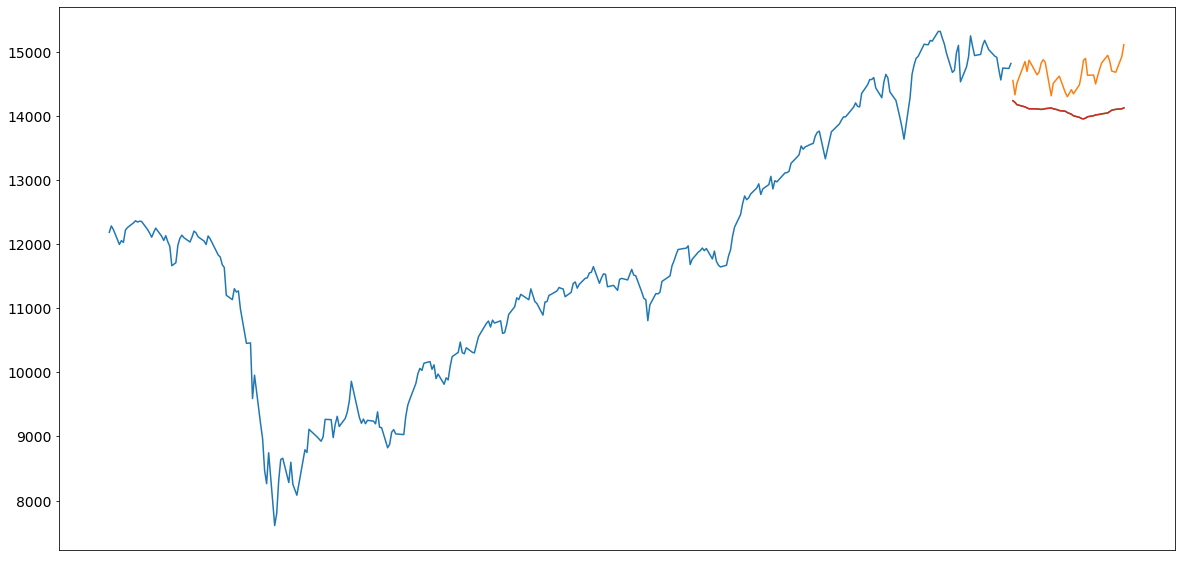

In [16]:
train_close_data=new_close_dataset[:train_value]
valid_close_data=new_close_dataset[train_value:]
valid_close_data['Predictions']=prediction_closing
plt.plot(train_close_data["Close"])
plt.plot(valid_close_data[["Close","Predictions"]]) # prediction-blue
plt.plot(valid_close_data[["Predictions"]])

In [17]:
import datetime
base = datetime.date.today()
for x in range(0, remain_value):
    valid_open_data['Date'][x] = (base + datetime.timedelta(days=x))


<ipython-input-17-756d2332187a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_open_data['Date'][x] = (base + datetime.timedelta(days=x))


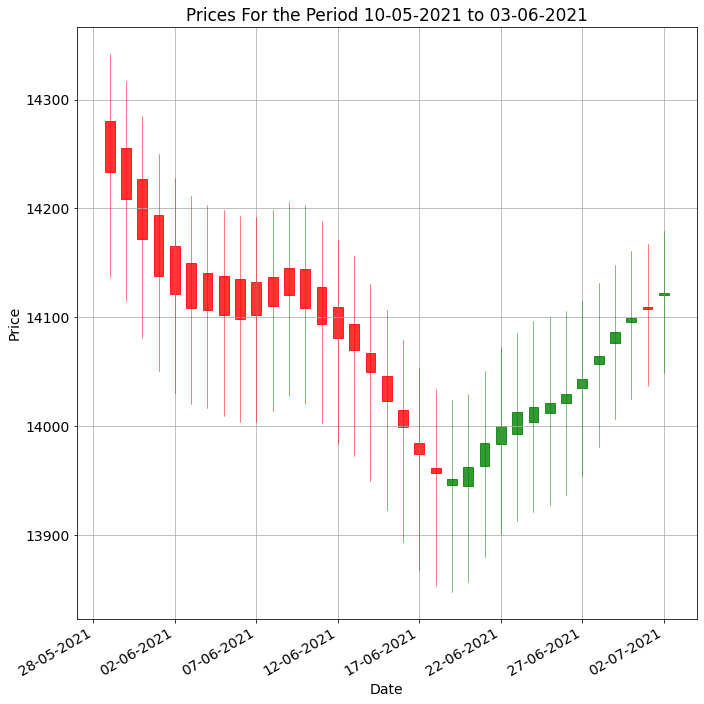

In [18]:
df = pd.DataFrame({
    'Date': [i for i in valid_open_data['Date']],
    'Open': [i for i in valid_open_data['Predictions']],
    'High': [i for i in valid_high_data['Predictions']],
    'Low': [i for i in valid_low_data['Predictions']],
    'Close': [i for i in valid_close_data['Predictions']],

})
# convert into datetime object
df['Date'] = pd.to_datetime(df['Date'])

# apply map function
df['Date'] = df['Date'].map(mpdates.date2num)

# creating Subplots
fig, ax = plt.subplots(figsize=(10, 10))

# plotting the data
candlestick_ohlc(ax, df.values, width=0.6,
                 colorup='green', colordown='red',
                 alpha=0.8)

# allow grid
ax.grid(True)

# Setting labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# setting title
plt.title('Prices For the Period 10-05-2021 to 03-06-2021')

# Formatting Date
date_format = mpdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

# show the plot
plt.show()